<a href="https://colab.research.google.com/github/swapnalishamrao/Advertising_Saleas_Linear_Regression/blob/main/AdvertisingSalesLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict sales revenue

Feature Descriptions
1. TV - Spend on TV Advertisements
2. Radio - Spend on radio Advertisements
3. Newspaper - Spend on newspaper Advertisements
4. Sales - Sales revenue generated

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
pwd()

'/content'

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
demo = pd.read_csv("/gdrive/My Drive/General Machine Learning Training/Advertising Case Study/Advertising.csv")
demo.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
type(demo)

pandas.core.frame.DataFrame

In [ ]:
demo = demo.drop('Unnamed: 0',axis=1)
demo.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
demo.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
X = demo[['TV','Radio','Newspaper']]
y = demo[['Sales']]

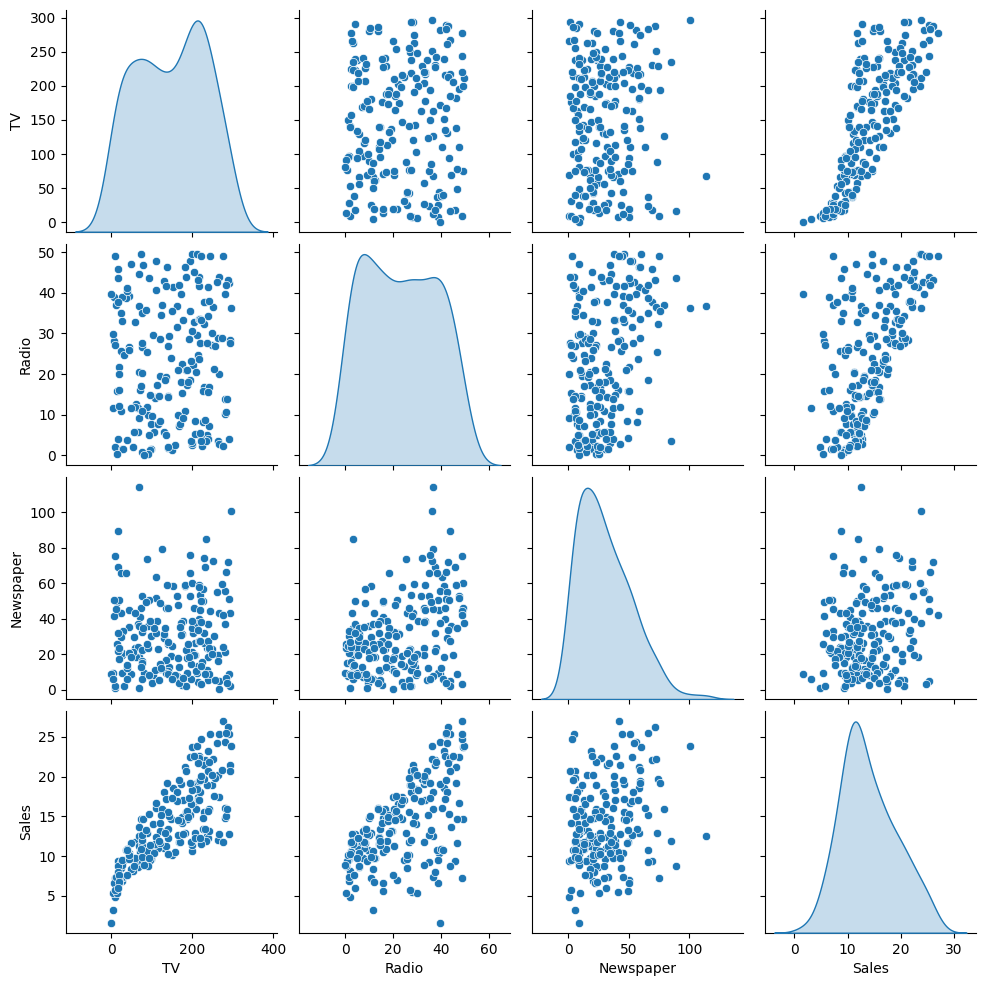

In [ ]:
sns.pairplot(demo,diag_kind='kde')

<Axes: >

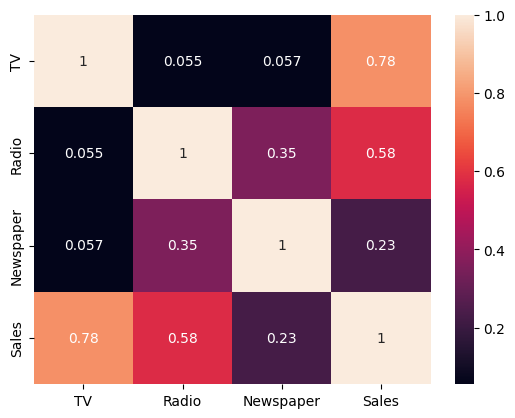

In [ ]:
data=demo
sns.heatmap(data.corr(), annot=True)

Sales is dependent / target variable

TV, Radio and Newspaper are independent variables

In [ ]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(demo)
sweet_report.show_html('sweet_report.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 118.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
data = demo

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
powerdata = pd.DataFrame(pt.fit_transform(data))
powerdata.columns = data.columns
powerdata.head()

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


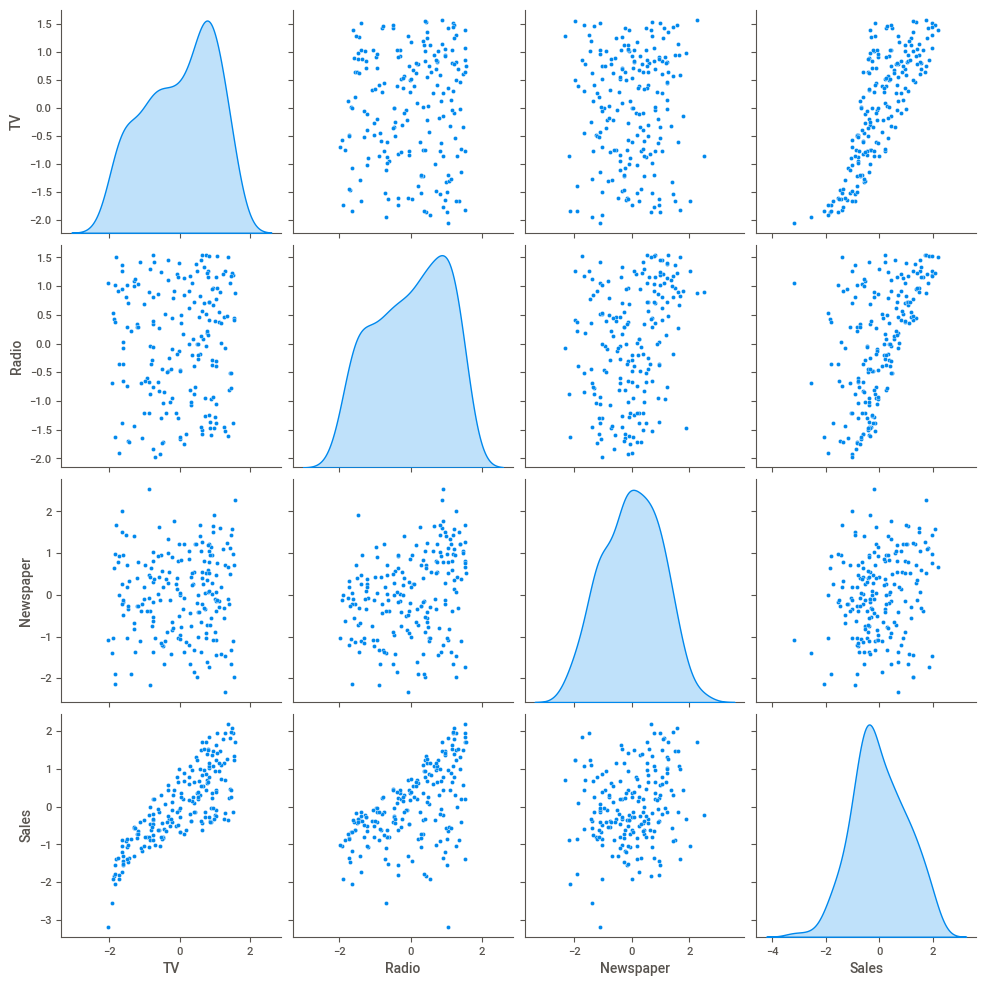

In [ ]:
sns.pairplot(powerdata,diag_kind='kde')

Observations:
1. The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. We can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then between sales and radio i.e. 0.576.
2. Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.

In [ ]:
from sklearn import metrics

In [ ]:
x = data[["TV","Radio","Newspaper"]]
y = data[["Sales"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
print(model2.coef_)
print(model2.intercept_)
#With TV, Radio, Newspaper
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

[[0.0468431  0.17854434 0.00258619]]
[2.90794702]
Training R2
0.8959372632325174
Testing R2
0.8927605914615384


In [ ]:
#With TV,Radio
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

Training R2
0.8958528468776601
Testing R2
0.8947344950027066


In [ ]:
from sklearn.metrics import mean_squared_error
predicted = model2.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

RMSE
1.398292489077775


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
sc = StandardScaler()
scaledXtrain = sc.fit_transform(x_train)
scaledXtest = sc.transform(x_test)
lr=LinearRegression()
lr.fit(scaledXtrain,y_train)
print("Training R2")
print(lr.score(scaledXtrain,y_train))
print("Testing R2")
print(lr.score(scaledXtest,y_test))
predicted = lr.predict(scaledXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.8958528468776601
Testing R2
0.8947344950027067
RMSE
1.3982924890777741


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("sc", StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)

Training R2
0.8958528468776601
Testing R2
0.8947344950027067


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("pt", PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)

Training R2
0.9096987246658746
Testing R2
0.9059180802510014


In [ ]:
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.metrics import mean_squared_error
poly = PolynomialFeatures(degree=3)
polyXtrain = poly.fit_transform(x_train)
polyXtest = poly.transform(x_test)
lr=LinearRegression()
lr.fit(polyXtrain,y_train)
print("Training R2")
print(lr.score(polyXtrain,y_train))
print("Testing R2")
print(lr.score(polyXtest,y_test))
predicted = lr.predict(polyXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9908688938084677
Testing R2
0.9917493901619217
RMSE
0.3914695718547267


In [ ]:
temp = pd.DataFrame(polyXtrain)
temp['sales'] = y_train
temp.head()

,0,1,2,3,4,5,6,7,8,9,sales
0,1.0,13.1,0.4,171.61,5.24,0.16,2248.091,68.644,2.096,0.064,22.1
1,1.0,90.4,0.3,8172.16,27.12,0.09,738763.264,2451.648,8.136,0.027,10.4
2,1.0,18.7,12.1,349.69,226.27,146.41,6539.203,4231.249,2737.867,1771.561,9.3
3,1.0,204.1,32.9,41656.81,6714.89,1082.41,8502154.921,1370509.049,220919.881,35611.289,18.5
4,1.0,7.3,28.1,53.29,205.13,789.61,389.017,1497.449,5764.153,22188.041,NaN


With Newspaper Model is more overfit

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.metrics import mean_squared_error
pt = PowerTransformer()
poly = PolynomialFeatures(degree=1)
powerXtrain = pt.fit_transform(x_train)
powerXtest = pt.transform(x_test)
polyXtrain = poly.fit_transform(powerXtrain)
polyXtest = poly.transform(powerXtest)
lr=LinearRegression()
lr.fit(polyXtrain,y_train)
print("Training R2")
print(lr.score(polyXtrain,y_train))
print("Testing R2")
print(lr.score(polyXtest,y_test))
predicted = lr.predict(polyXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9096987246658746
Testing R2
0.9059180802510014
RMSE
1.321928820243303


In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("poly", PolynomialFeatures(degree=4)),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9928456308627833
Testing R2
0.9948306978847508
RMSE
0.3098638717903782


<Axes: ylabel='Density'>

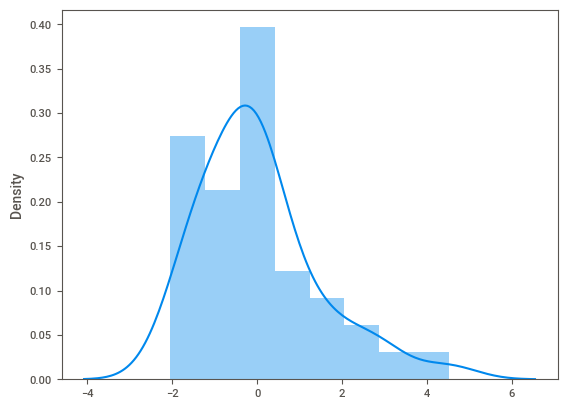

In [ ]:
error = pipe.predict(x_test) - y_test
sns.distplot(error)

In [ ]:
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,x_train,y_train,cv=10)
print(scoreslr)

[0.72933541 0.93853415 0.92017338 0.94433273 0.89466767 0.92808207
 0.79669501 0.94633204 0.92094023 0.93473868]


In [ ]:
import numpy as np
np.mean(scoreslr)

0.8953831366923952

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
pt = PowerTransformer()
powerXtrain = pt.fit_transform(x_train)
powerXtest = pt.transform(x_test)
lr=LinearRegression()
lr.fit(powerXtrain,y_train)
print("Training R2")
print(lr.score(powerXtrain,y_train))
print("Testing R2")
print(lr.score(powerXtest,y_test))
predicted = lr.predict(powerXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9202468309343568
Testing R2
0.8294733543226074
RMSE
1.779825452481862


In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9096987246658746
Testing R2
0.9059180802510014
RMSE
1.321928820243303


In [ ]:
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,x_train,y_train,cv=10)
print(scoreslr)
np.mean(scoreslr)

[0.93807598 0.91115434 0.90104423 0.86974096 0.85498007 0.90722088
 0.91794667 0.89115696 0.96299336 0.87245304]


0.9026766481416623

In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=2)),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9911387469286319
Testing R2
0.9909374089394237
RMSE
0.4102807846294562
Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2022-03-22 12:13:55,284 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...
Executing shutdown...


2022-03-22 12:14:11,366 - INFO     - Executing shutdown...


In [ ]:
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=500)),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.9999774028558083
Testing R2
0.9802450950587673
RMSE
0.6057486540565213


Automatically created module for IPython interactive environment


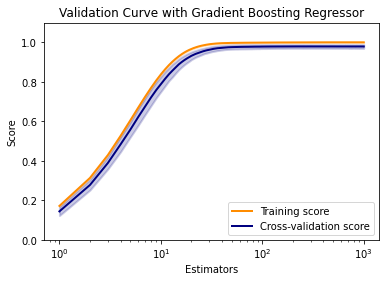

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
X = data[["TV","Radio"]]
y = data[["Sales"]]
param_range = np.arange(1,1000)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), X, y, param_name="n_estimators", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()